# 1. 基本情况

## 题目：

## 日期：

## 成员：

序号 | 学号 | 姓名 | 主要工作 | 贡献度
:-:|:-:|:-:|:-|:-:
1 |20222752 |鲁哲予 |获取数据和处理 |15% 
2 | | |15% | 
3 | | |14% | 
4 | | |14% | 
5 | | |14% | 
6 | | |14% |
7 | | |14%

>说明：
>1. 主要工作简要写明每位成员承担的工作内容。
>2. 按成员的贡献给出百分比，贡献度总和=100%

# 2. 选题的目的与意义

>注：为什么要选择这个题目？意义是什么？


# 3. 实现目标
对北京二手房数据进行分析和预测


# 4. 版本说明
- pandas 2.2.2
- matplotlib 3.8.4
- seaborn 0.13.2
- scikit-learn 1.4.2
- plotly 6.0.1
- numpy 1.26.4



In [ ]:
# 引入包，将作业使用的包都放在这里一并引入
# 如有可视化设置，也在这里写明
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error

# 5. 数据来源

>注：
>1. 说明数据的获取方法，使用的语句。
>2. 将数据源保存成 _csv_ 格式的文件，与作业一起上交。

In [ ]:
LianjiaDf = pd.read_csv("lianjia_beijing_ershoufangshuju.csv")
print(LianjiaDf .dtypes)
print(LianjiaDf.info)
print(LianjiaDf.describe())

# 6. 数据分析过程

>注：写清楚数据分析、处理、转换、可视化的流程、步骤、关键语句、可视化结果及结论。

In [22]:
LianjiaDf = pd.read_csv("lianjia_beijing_ershoufangshuju.csv")
print(LianjiaDf .dtypes)
print(LianjiaDf.info)
print(LianjiaDf.describe())

ID              int64
Direction      object
Community      object
Elevator       object
Floor          object
TotalFloor      int64
Layout         object
Price         float64
Region         object
Renovation     object
Size          float64
Year          float64
dtype: object
<bound method DataFrame.info of                 ID Direction Community Elevator Floor  TotalFloor Layout  \
0     101122188414        南北   首开常青藤二期        有   低楼层           6   3室1厅   
1     101121748777        南北    北街家园八区        有   中楼层          17   2室1厅   
2     101121548718         西    万年花城三期        有    底层          16   2室1厅   
3     101123385956         南    中海金玺公馆        有   高楼层          15   2室1厅   
4     101119770315        南北  草桥东路16号楼        有   中楼层          14   2室1厅   
...            ...       ...       ...      ...   ...         ...    ...   
2995  101123179603       南西北   广安﹒康馨家园        有   中楼层          28   3室2厅   
2996  101120905559        南北      美景东方        有   低楼层          12   1室1厅   
2997  

In [23]:
df = LianjiaDf.copy()
df['PerPrice'] = (LianjiaDf['Price']/LianjiaDf['Size'])*10000
df.head(n=10)
print("重复数据的的数量：",df.duplicated().sum())
df = df.drop_duplicates()
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())
print("处理后重复数据的的数量：",df.duplicated().sum())
print(df.count())

重复数据的的数量： 798
ID               0
Direction        0
Community        0
Elevator         1
Floor            0
TotalFloor       0
Layout           0
Price            0
Region           0
Renovation       0
Size             0
Year          1180
PerPrice         0
dtype: int64
ID            0
Direction     0
Community     0
Elevator      0
Floor         0
TotalFloor    0
Layout        0
Price         0
Region        0
Renovation    0
Size          0
Year          0
PerPrice      0
dtype: int64
处理后重复数据的的数量： 0
ID            1022
Direction     1022
Community     1022
Elevator      1022
Floor         1022
TotalFloor    1022
Layout        1022
Price         1022
Region        1022
Renovation    1022
Size          1022
Year          1022
PerPrice      1022
dtype: int64


In [24]:
df_house_number_count = df.groupby("Region")["Price"].count().sort_values(ascending=False).to_frame().reset_index()
df_house_per_price = df.groupby("Region")['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

In [25]:
df_house_number_count.rename(columns={'Price':"Number"},inplace=True)
df_house_number_count

,Region,Number
0,朝阳,304
1,丰台,122
2,海淀,106
3,通州,80
4,昌平,79
5,房山,71
6,大兴,61
7,西城,56
8,顺义,43
9,石景山,37


In [27]:
px.box(data_frame=df, x="Region", y='Price', color="Region", width=800,height=600,title="北京各大区二手房房屋总价")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Region=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '朝阳',
              'marker': {'color': '#636efa'},
              'name': '朝阳',
              'notched': False,
              'offsetgroup': '朝阳',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array(['朝阳', '朝阳', '朝阳', ..., '朝阳', '朝阳', '朝阳'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAABQhEAAAAAAAMByQAAAAAAAAJ' ... 'AAAAByQAAAAAAAwHpAAAAAAACwdEA='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Region=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '丰台',
              'marker': {'color': '#EF553B'},
              'name': '丰台',
              'notched': False,
              'offsetgroup': '丰台',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array(['丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台', '丰台',
                          '丰台', '丰台'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAABAekAAAAAAANBxQAAAAAAAkI' ... 'AA4GVAAAAAAAAwgUAAAAAAAOB9QA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Region=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '石景山',
              'marker': {'color': '#00cc96'},
              'name': '石景山',
              'notched': False,
              'offsetgroup': '石景山',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array(['石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山',
                          '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山',
                          '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山',
                          '石景山', '石景山', '石景山', '石景山', '石景山', '石景山', '石景山'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAACwgkAAAAAAAOBjQAAAAAAA4G' ... 'AAAAB2QAAAAAAAMHBAAAAAAABAd0A='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Region=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '海淀',
              'marker': {'color': '#ab63fa'},
              'name': '海淀',
              'notched': False,
              'offsetgroup': '海淀',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array(['海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀',
                          '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀', '海淀',
         

In [18]:
px.bar(df_house_number_count,x="Region",y="Number",color="Region",title="北京各大区二手房数量对比")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '朝阳',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '朝阳',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['朝阳'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'MAE=', 'dtype': 'i2'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '丰台',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': '丰台',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['丰台'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'eg==', 'dtype': 'i1'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '海淀',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': '海淀',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['海淀'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'ag==', 'dtype': 'i1'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '通州',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': '通州',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['通州'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'UA==', 'dtype': 'i1'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '昌平',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': '昌平',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['昌平'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'Tw==', 'dtype': 'i1'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '房山',
              'marker': {'color': '#19d3f3', 'pattern': {'shape': ''}},
              'name': '房山',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['房山'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'Rw==', 'dtype': 'i1'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '大兴',
              'marker': {'color': '#FF6692', 'pattern': {'shape': ''}},
              'name': '大兴',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['大兴'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'PQ==', 'dtype': 'i1'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '西城',
              'marker': {'color': '#B6E880', 'pattern': {'shape': ''}},
              'name': '西城',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['西城'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'OA==', 'dty

In [28]:
px.bar(data_frame=df_house_per_price, x="Region", y='PerPrice', color="Region", width=800,height=600,title="北京各大区二手房每平方价格对比")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '西城',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '西城',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['西城'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'DQD6/B+A+0A=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '东城',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': '东城',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['东城'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': '2UpmROqC90A=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '海淀',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': '海淀',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['海淀'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'Qkj5xBlf9EA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '朝阳',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': '朝阳',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['朝阳'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'B9kSre2p7EA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '亦庄开发区',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': '亦庄开发区',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['亦庄开发区'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'Y59biNGs6UA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '丰台',
              'marker': {'color': '#19d3f3', 'pattern': {'shape': ''}},
              'name': '丰台',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['丰台'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'qWaqTDHd6EA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '石景山',
              'marker': {'color': '#FF6692', 'pattern': {'shape': ''}},
              'name': '石景山',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['石景山'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': '30XoIL9N5UA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Region=%{x}<br>PerPrice=%{y}<extra></extra>',
              'legendgroup': '昌平',
              'marker': {'color': '#B6E880', 'pattern': {'shape': ''}},
              'name': '昌平',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['昌平'], 

C:\Users\57177\AppData\Local\Temp\ipykernel_46216\1239489566.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\57177\AppData\Local\Temp\ipykernel_46216\1239489566.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\57177\AppData\Local\Temp\ipykernel_46216\1239489566.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gui

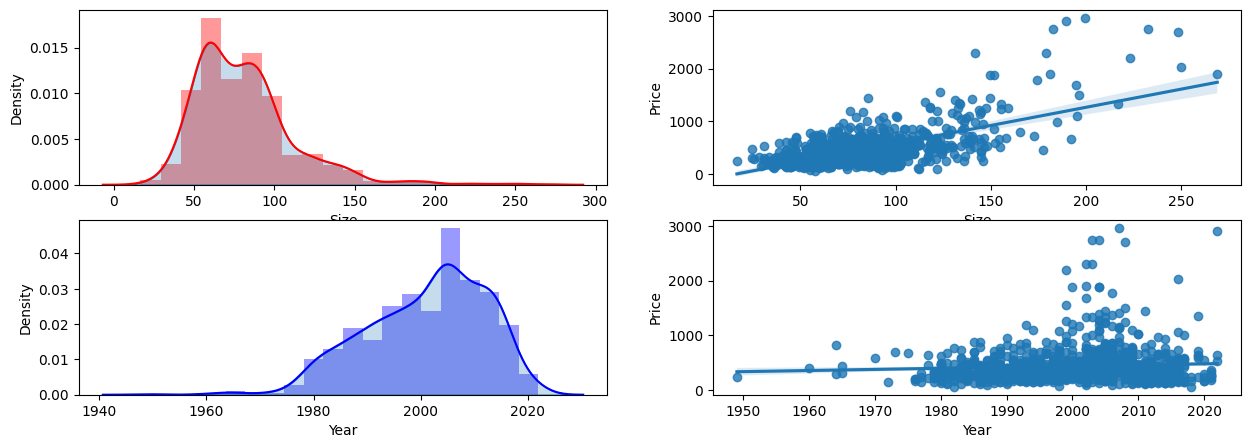

In [29]:
f, [ax1,ax2] = plt.subplots(2, 2, figsize=(15, 5))
# 建房时间的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1[0], color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1[0])
# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax1[1])
sns.distplot(df['Year'], bins=20, ax=ax2[0], color='b')
sns.kdeplot(df['Year'], shade=True, ax=ax2[0])
sns.regplot(x="Year",y="Price",data=df,ax=ax2[1])
plt.show()

In [30]:
dfLayoutCount = df.groupby("Layout")["ID"].count().sort_values(ascending=False).to_frame().reset_index()
dfLayoutCount =  dfLayoutCount.rename(columns={"ID":"Number"})
px.bar(data_frame=dfLayoutCount,x="Layout",y="Number",width=800,height=600,title="北京各大区二手房户型数量对比")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Layout=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['2室1厅', '3室1厅', '1室1厅', '3室2厅', '2室2厅', '1室0厅', '4室2厅', '4室1厅', '1室2厅',
                          '2室0厅', '3室0厅', '3室3厅', '5室1厅'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': '+AGlAJ0ASwA7ACIADAAGAAUAAgABAAEAAQA=', 'dtype': 'i2'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '北京各大区二手房户型数量对比'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Layout'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Number'}}}
})

In [31]:
dfRenovationCount = df.groupby("Renovation")['ID'].count().reset_index()
print(dfRenovationCount)
px.box(data_frame=df,x="Renovation",y="Price",width=800,height=600,title="beijign")

  Renovation   ID
0         其他   19
1         毛坯   21
2         简装  424
3         精装  558


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Renovation=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['简装', '精装', '简装', ..., '精装', '精装', '简装'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAABQhEAAAAAAAEB6QAAAAAAAsI' ... 'AAwHpAAAAAAADgfUAAAAAAALB0QA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'beijign'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Renovation'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Price'}}}
})

In [32]:
dfDirection = df.groupby("Direction")['ID'].count().reset_index().rename(columns={"ID":"Number"})
px.bar(data_frame=dfDirection,x="Direction",y="Number",width=800,height=600,title="北京各大区二手房朝向数量对比")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Direction=%{x}<br>Number=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['东', '东北', '东南', '东南东南', '东南北', '东南西', '东南西北', '东西', '东西北', '北', '北南',
                          '南', '南东北', '南北', '南北西', '南北西南', '南西', '南西北', '南西南', '西', '西东北', '西北',
                          '西北东北', '西北西北', '西南', '西南东北', '西南北'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'KQATAD8AAQAUAAQAAwAdAAMAEwAHAMcAAQDtAQQAAQAIAAYAAQAaAAEAEQABAAEAKAADAAsA', 'dtype': 'i2'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '北京各大区二手房朝向数量对比'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Direction'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Number'}}}
})

In [33]:
dfFloorPrice = df.groupby("Floor")['Price'].mean().sort_values(ascending=False).reset_index()
print(dfFloorPrice)
px.bar(data_frame=dfFloorPrice,x="Floor",y="Price",width=800,height=600,title="北京各大区二手房各楼层价格对比")

  Floor       Price
0   高楼层  461.640777
1    底层  456.875000
2   中楼层  455.795377
3   低楼层  454.386161
4    顶层  324.430108


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Floor=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['高楼层', '底层', '中楼层', '低楼层', '顶层'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': '52URn0DafEAAAAAAAI58QHxNXt25fHxAt23bti1mfECHG2644UZ0QA==', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '北京各大区二手房各楼层价格对比'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Floor'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Price'}}}
})

In [34]:
dfElevator = df.groupby("Elevator")["Price"].mean().sort_values(ascending=False).reset_index()
dfElevator
px.bar(data_frame=dfElevator,x="Elevator",y="Price",width=800,height=600,title="北京各大区二手房有无电梯价格对比")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Elevator=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['有', '无', '暂无数据'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'fDzC+Hhcf0AQlwZLzCN3QNPS0tLSUmlA', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '北京各大区二手房有无电梯价格对比'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Elevator'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Price'}}}
})

In [35]:
px.scatter(df,x="Year",y="Price",facet_row="Elevator",facet_col="Renovation",color="Elevator",width=1600,height=600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Elevator=有<br>Renovation=简装<br>Year=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '有',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '有',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAAB0n0AAAAAAAISfQAAAAAAAgJ' ... 'AAAABUn0AAAAAAAFyfQAAAAAAAWJ9A'),
                    'dtype': 'f8'},
              'xaxis': 'x9',
              'y': {'bdata': ('AAAAAABQhEAAAAAAALCCQAAAAAAAYH' ... 'AAAADgakAAAAAAAFiBQAAAAAAAsHRA'),
                    'dtype': 'f8'},
              'yaxis': 'y9'},
             {'hovertemplate': 'Elevator=有<br>Renovation=精装<br>Year=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '有',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '有',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAABYn0AAAAAAAECfQAAAAAAAbJ' ... 'AAAACEn0AAAAAAAGyfQAAAAAAAfJ9A'),
                    'dtype': 'f8'},
              'xaxis': 'x10',
              'y': {'bdata': ('AAAAAABAekAAAAAAANSSQAAAAAAAwH' ... 'AAAAAwgUAAAAAAAMB6QAAAAAAA4H1A'),
                    'dtype': 'f8'},
              'yaxis': 'y10'},
             {'hovertemplate': 'Elevator=有<br>Renovation=毛坯<br>Year=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '有',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '有',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAACQn0AAAAAAAHifQAAAAAAAjJ' ... 'AAAHifQAAAAAAAgJ9AAAAAAACUn0A='),
                    'dtype': 'f8'},
              'xaxis': 'x11',
              'y': {'bdata': ('AAAAAABwckAAAAAAAEBrQAAAAAAAAG' ... 'AAADB2QAAAAAAAsIJAAAAAAABgbEA='),
                    'dtype': 'f8'},
              'yaxis': 'y11'},
             {'hovertemplate': 'Elevator=有<br>Renovation=其他<br>Year=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '有',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '有',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAABQn0AAAAAAAHifQAAAAAAAeJ' ... 'AAAABMn0AAAAAAAHSfQAAAAAAALJ9A'),
                    'dtype': 'f8'},
              'xaxis': 'x12',
              'y': {'bdata': ('AAAAAADQgEAAAAAAAOBjQAAAAAAAQH' ... 'AAAADohEAAAAAAAMBsQAAAAAAAQGhA'),
                    'dtype': 'f8'},
              'yaxis': 'y12'},
             {'hovertemplate': 'Elevator=无<br>Renovation=简装<br>Year=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '无',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '无',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAADwnkAAAAAAABCfQAAAAAAACJ' ... 'AADJ9AAAAAAAAIn0AAAAAAAEifQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x5',
              'y': {'bdata': ('AAAAAADQcUAAAAAAAOBgQAAAAAAAkH' ... 'AAcIBAAAAAAAD4iEAAAAAAAGiHQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y5'},
             {'hovertemplate': 'Elevator=无<br>Renovation=精装<br>Year=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '无',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '无',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAAAsn0AAAAAAACyfQAAAAAAACJ' ... 'AAAAAsn0AAAAAAACSfQAAAAAAALJ9A'),
                    'dtype': 'f8'},
              'xaxis': 'x6',
              'y': {'bdata': ('AAAAAACQgEAAAAAAAIBsQAAAAAAA4H' ... 'AAAADgZUAAAAAAAAByQAAAAAAAEIZA'),
                    'dtype': 'f8'},
   

# 7. 模型建立与评估
预测房屋价格

>注：对有模型预测的题目，请写明数据库划分的方法、模型的选择、模型的评估及预测的结论。如没有预测，此部分可不写。

In [37]:
encoder = LabelEncoder()
y = df.Price
region = encoder.fit(df.Region.unique()).transform(df.Region) # 区域
community = encoder.fit(df.Community.unique()).transform(df.Community) # 小区
elevator = encoder.fit(df.Elevator.unique()).transform(df.Elevator) # 有无电梯
direction = encoder.fit(df.Direction.unique()).transform(df.Direction) # 房屋朝向
floor = encoder.fit(df.Floor.unique()).transform(df.Floor) # 所在楼层
layout = encoder.fit(df.Layout.unique()).transform(df.Layout) # 房屋布局(几室几厅）
size = df.Size # 房屋面积
renovation = encoder.fit(df.Renovation.unique()).transform(df.Renovation) # 房屋装修状况
year = encoder.fit_transform(df.Year)
x = np.mat([size,year,layout,floor,elevator,renovation,direction,region,community]).T
x = np.array(x)

In [38]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(715, 9) (715,)
(307, 9) (307,)


In [39]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=1200, num=50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {
        'criterion': ["squared_error","poisson"],
       'n_estimators': n_estimators,
       'max_features': [3, 5, 8, 'sqrt', 'log2'],
       'max_depth': max_depth,
       'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf,
       'bootstrap': bootstrap
    }
# 构建模型
clf = RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,n_iter=20,cv=2, verbose=2, random_state=42, n_jobs=1)
# 回归
clf_random.fit(train_x, train_y)
print(clf_random.best_params_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END bootstrap=True, criterion=squared_error, max_depth=80, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1118; total time=   0.9s
[CV] END bootstrap=True, criterion=squared_error, max_depth=80, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1118; total time=   0.9s
[CV] END bootstrap=True, criterion=squared_error, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=404; total time=   0.2s
[CV] END bootstrap=True, criterion=squared_error, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=404; total time=   0.2s
[CV] END bootstrap=False, criterion=poisson, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=608; total time=   0.3s
[CV] END bootstrap=False, criterion=poisson, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=608; total time=   0.

In [44]:
rf = RandomForestRegressor(n_estimators=853, min_samples_split=2, min_samples_leaf=2,max_features='log2',max_depth=90, bootstrap=False)
rf.fit(train_x,train_y)
train_y_pred = rf.predict(train_x)
test_y_pred = rf.predict(test_x)
print(rf.feature_importances_)
print("决策树模型评估--训练集：")
print('训练r^2:', rf.score(train_x, train_y))
print('均方差', mean_squared_error(train_y, train_y_pred))
print('绝对差', mean_absolute_error(train_y, train_y_pred))
print('解释度', explained_variance_score(train_y, train_y_pred))

print("决策树模型评估--验证集：")
print('验证r^2:', rf.score(test_x, test_y))
print('均方差', mean_squared_error(test_y, test_y_pred))
print('绝对差', mean_absolute_error(test_y, test_y_pred))
print('解释度', explained_variance_score(test_y, test_y_pred))
df_pre = pd.read_csv("pre-checkpoint.csv")
region = encoder.fit(df_pre.Region.unique()).transform(df_pre.Region)  # 区域
community = encoder.fit(df_pre.Community.unique()).transform(df_pre.Community)  # 小区
elevator = encoder.fit(df_pre.Elevator.unique()).transform(df_pre.Elevator)  # 有无电梯
direction = encoder.fit(df_pre.Direction.unique()).transform(df_pre.Direction)  # 房屋朝向
floor = encoder.fit(df_pre.Floor.unique()).transform(df_pre.Floor)  # 所在楼层
layout = encoder.fit(df_pre.Layout.unique()).transform(df_pre.Layout)  # 房屋布局(几室几厅）
size = df_pre.Size  # 房屋面积
renovation = encoder.fit(df_pre.Renovation.unique()).transform(df_pre.Renovation)  # 房屋装修状况
year = encoder.fit_transform(df_pre.Year)
x_pre = np.mat([size, year, layout, floor, elevator, renovation, direction, region, community]).T
x_pre = np.array(x_pre)
y_pred = rf.predict(x_pre)
result = pd.DataFrame()
result['Community'] = df_pre.Community
result["Region"] = df_pre.Region
result["Size"] = df_pre.Size
result["Year"] = df_pre.Year
result["Layout"] = df_pre.Layout
result["Floor"] = df_pre.Floor
result["Elevator"] = df_pre.Elevator
result["Renovation"] = df_pre.Renovation
result["Direction"] = df_pre.Direction
result["Price"] = df_pre.Price
result["PrePrice"] = y_pred.round(2)
print(result.head())
result.to_csv("result-checkpoint.csv", index=False,encoding="utf-8")

[0.44120121 0.07357975 0.18467578 0.02401468 0.02784104 0.02815223
 0.01891946 0.13545046 0.06616538]
决策树模型评估--训练集：
训练r^2: 0.969078014804104
均方差 3449.6992169569867
绝对差 32.621419093618
解释度 0.969078014804104
决策树模型评估--验证集：
验证r^2: 0.6726269984879591
均方差 32296.695892159216
绝对差 113.39094570184523
解释度 0.6726889524438477
  Community Region    Size  Year Layout Floor Elevator Renovation Direction  \
0  草桥东路16号楼     丰台   63.45   NaN   2室1厅   中楼层        有         简装        南北   
1    富力惠兰美居     通州   77.73   NaN   2室1厅   高楼层        有         精装       东西北   
2     田家园小区     房山  116.97   NaN   3室2厅   中楼层        无         精装        南北   
3   八里庄北里小区     朝阳   82.78   NaN   3室1厅   中楼层        有         精装        东西   
4    世纪星城三期     通州   99.51   NaN   2室2厅   高楼层        有         精装        南北   

   Price  PrePrice  
0  386.0    370.14  
1  239.0    507.37  
2  142.0    455.27  
3  369.0    374.56  
4  459.0    564.43  


In [45]:
df.head()

,ID,Direction,Community,Elevator,Floor,TotalFloor,Layout,Price,Region,Renovation,Size,Year,PerPrice
0,101122188414,南北,首开常青藤二期,有,低楼层,6,3室1厅,650.0,朝阳,简装,91.19,2013.0,71279.745586
2,101121548718,西,万年花城三期,有,底层,16,2室1厅,420.0,丰台,精装,79.89,2006.0,52572.286894
3,101123385956,南,中海金玺公馆,有,高楼层,15,2室1厅,598.0,石景山,简装,89.78,2017.0,66607.262196
5,101123004780,南北,看丹路10号院,无,底层,6,3室1厅,285.0,丰台,简装,60.08,1980.0,47436.750999
7,101123799030,西南北,恒兴大厦,有,低楼层,25,3室1厅,1205.0,海淀,精装,143.92,2000.0,83727.070595


In [46]:
max_features = [int(x) for x in np.linspace(10, 100, num = 10)]
max_features.append('sqrt')
max_features.append('log2')
max_features

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 'sqrt', 'log2']

# 8. 总结
